In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
data = pd.read_csv("Phishing_Email.csv")

In [3]:
data.head()

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [4]:
data["Email Text"][3]

'\nHello I am your hot lil horny toy.\n    I am the one you dream About,\n    I am a very open minded person,\n    Love to talk about and any subject.\n    Fantasy is my way of life, \n    Ultimate in sex play.     Ummmmmmmmmmmmmm\n     I am Wet and ready for you.     It is not your looks but your imagination that matters most,\n     With My sexy voice I can make your dream come true...\n  \n     Hurry Up! call me let me Cummmmm for you..........................\nTOLL-FREE:             1-877-451-TEEN (1-877-451-8336)For phone billing:     1-900-993-2582\n-- \n_______________________________________________\nSign-up for your own FREE Personalized E-mail at Mail.com\nhttp://www.mail.com/?sr=signup'

In [5]:
data.isna().sum()

Unnamed: 0     0
Email Text    16
Email Type     0
dtype: int64

In [6]:
data.dropna(inplace=True)

In [7]:
data.isna().sum()

Unnamed: 0    0
Email Text    0
Email Type    0
dtype: int64

In [8]:
email_typecount = data["Email Type"].value_counts()

In [9]:
email_typecount

Safe Email        11322
Phishing Email     7312
Name: Email Type, dtype: int64

In [10]:
uniqueemail_types = email_typecount.index.tolist()

In [11]:
uniqueemail_types

['Safe Email', 'Phishing Email']

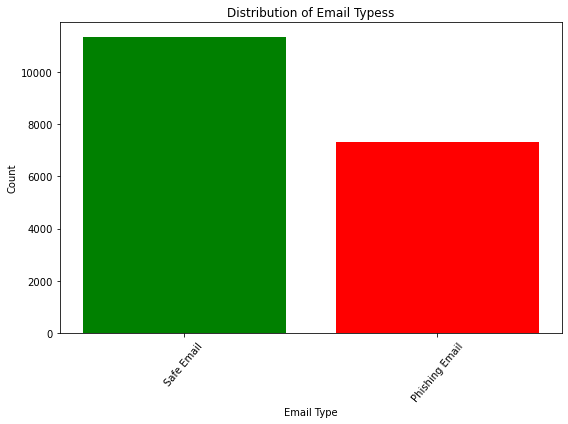

In [12]:
uniqueemail_types = email_typecount.index.tolist()

# Define a custom color map 
color_map = {
    'Phishing Email': 'red',
    'Safe Email': 'green',}

# Map the colors to each email type
colors = [color_map.get(email_type) for email_type in uniqueemail_types]

# Create the bar chart with custom colors
plt.figure(figsize=(8, 6))
plt.bar(uniqueemail_types, email_typecount, color=colors)
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.title('Distribution of Email Typess')
plt.xticks(rotation=50)

# Show the chart
plt.tight_layout()
plt.show()

In [13]:
safe_emails = data[data["Email Type"]=="Safe Email"]
Phishing_emails = data[data["Email Type"]=="Phishing Email"]

In [14]:
safe_emails = safe_emails.sample(Phishing_emails.shape[0])

In [15]:
safe_emails.shape


(7312, 3)

In [16]:
Phishing_emails.shape

(7312, 3)

In [17]:
final_data = pd.concat([safe_emails, Phishing_emails], ignore_index = True)
final_data.head()

,Unnamed: 0,Email Text,Email Type
0,8542,fw : kitchen / nettleton tax and misc issues l...,Safe Email
1,18387,"URL: http://www.newsisfree.com/click/-4,827807...",Safe Email
2,16422,out of office ( jury duty ) i will be out of t...,Safe Email
3,13575,URL: http://www.aaronsw.com/weblog/000615\nDat...,Safe Email
4,1353,south hampton refining i have added deal # 541...,Safe Email


In [18]:
final_data.shape

(14624, 3)

In [19]:
final_data.drop("Unnamed: 0",inplace=True,axis=1)

In [20]:
final_data.shape

(14624, 2)

In [21]:
final_data.head()

,Email Text,Email Type
0,fw : kitchen / nettleton tax and misc issues l...,Safe Email
1,"URL: http://www.newsisfree.com/click/-4,827807...",Safe Email
2,out of office ( jury duty ) i will be out of t...,Safe Email
3,URL: http://www.aaronsw.com/weblog/000615\nDat...,Safe Email
4,south hampton refining i have added deal # 541...,Safe Email


In [22]:
data = final_data.sample(frac=1).reset_index(drop=True)

In [23]:
data.head()

,Email Text,Email Type
0,"oil just hit record high , profit from delek -...",Phishing Email
1,"re : chapter chris , my part has not changed f...",Safe Email
2,japanese power market another article i though...,Safe Email
3,latina teens ! ! see these sweet latina honeys...,Phishing Email
4,"attract the opposite sex , the ultimate guide ...",Phishing Email


In [24]:
X = data["Email Text"].values
y = data["Email Type"].values
from sklearn.model_selection import train_test_split,RandomizedSearchCV
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from scipy.stats import randint
# define the Classifier

classifier_pipeline = Pipeline([("tfidf",TfidfVectorizer() ),("classifier",RandomForestClassifier(n_estimators=18))])

In [26]:
np.nan in y_train

False

In [27]:
classifier_pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier(n_estimators=18))])

In [29]:
classifier_pipeline.predict(["well well well"])[0]

'Phishing Email'

In [34]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix, precision_score, recall_score, f1_score,ConfusionMatrixDisplay
y_pred = classifier_pipeline.predict(X_test)
accuracy_score(y_test,y_pred)

0.9523701002734731

In [35]:
print("For Random Forest : ")
print("Accuracy:", accuracy_score(y_test,y_pred))
print("Precision:", precision_score(y_test,y_pred,pos_label="Phishing Email"))
print("Recall:", recall_score(y_test,y_pred,pos_label="Phishing Email"))
print("F1 Score:", f1_score(y_test,y_pred,pos_label="Phishing Email"),"\n")

For Random Forest : 
Accuracy: 0.9523701002734731
Precision: 0.9307624890446976
Recall: 0.976551724137931
F1 Score: 0.9531074713933139 



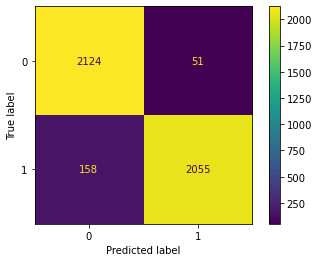

In [36]:
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();